In [14]:
import pandas as pd, numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

Imported Libraries
* Pandas → used for data manipulation and analysis. 
* NumPy → provides fast array operations and mathematical functions for numerical computations.  
* Matplotlib → used for creating basic plots (histograms, scatterplots, etc.).  
* Seaborn → built on Matplotlib, provides more stylish and statistical visualizations.  

In [2]:
data = "data/Talent_Academy_Case_DT_2025.xlsx"

In [3]:
df = pd.read_excel(data)

## To Understand the Overall Structure of the Data

In [4]:
df.shape

(2235, 13)

In [5]:
df.head()

,HastaNo,Yas,Cinsiyet,KanGrubu,Uyruk,KronikHastalik,Bolum,Alerji,Tanilar,TedaviAdi,TedaviSuresi,UygulamaYerleri,UygulamaSuresi
0,145134,60,Kadın,0 Rh+,Türkiye,"Becker Musküler Distrofisi, Hiportiroidizm, Ka...","Fiziksel Tıp Ve Rehabilitasyon,Solunum Merkezi",TOZ,Ayak bileği ve ayağın yüzeysel yaralanması,Ayak Bileği,5 Seans,Ayak Bileği,20 Dakika
1,145135,28,Erkek,0 Rh+,Türkiye,"Duchenne Musküler Distrofisi, Myastenia gravis...","Fiziksel Tıp Ve Rehabilitasyon,Solunum Merkezi",NaN,"Omuzun darbe sendromu,DORSALJİ, DİĞER, SERVİKO...",Dorsalji -Boyun+trapez+skapular,15 Seans,Boyun,20 Dakika
2,145135,28,Erkek,0 Rh+,Türkiye,"Duchenne Musküler Distrofisi, Myastenia gravis...","Fiziksel Tıp Ve Rehabilitasyon,Solunum Merkezi",NaN,"Omuzun darbe sendromu,DORSALJİ, DİĞER, SERVİKO...",Dorsalji -Boyun+trapez+skapular,15 Seans,"Boyun,Sırt",20 Dakika
3,145135,28,Erkek,0 Rh+,Türkiye,"Duchenne Musküler Distrofisi, Myastenia gravis...","Fiziksel Tıp Ve Rehabilitasyon,Solunum Merkezi",NaN,"Omuzun darbe sendromu,DORSALJİ, DİĞER, SERVİKO...",Dorsalji -Boyun+trapez+skapular,15 Seans,Boyun,5 Dakika
4,145135,28,Erkek,0 Rh+,Türkiye,"Duchenne Musküler Distrofisi, Myastenia gravis...","Fiziksel Tıp Ve Rehabilitasyon,Solunum Merkezi",NaN,"Omuzun darbe sendromu,DORSALJİ, DİĞER, SERVİKO...",Dorsalji -Boyun+trapez+skapular,15 Seans,"Boyun,Sırt",20 Dakika


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2235 entries, 0 to 2234
Data columns (total 13 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   HastaNo          2235 non-null   int64 
 1   Yas              2235 non-null   int64 
 2   Cinsiyet         2066 non-null   object
 3   KanGrubu         1560 non-null   object
 4   Uyruk            2235 non-null   object
 5   KronikHastalik   1624 non-null   object
 6   Bolum            2224 non-null   object
 7   Alerji           1291 non-null   object
 8   Tanilar          2160 non-null   object
 9   TedaviAdi        2235 non-null   object
 10  TedaviSuresi     2235 non-null   object
 11  UygulamaYerleri  2014 non-null   object
 12  UygulamaSuresi   2235 non-null   object
dtypes: int64(2), object(11)
memory usage: 227.1+ KB


## To Identify the Types of Variables

In [ ]:
df['TedaviSuresi'] = df['TedaviSuresi'].str.extract('(\d+)').astype(int)
df['UygulamaSuresi'] = df['UygulamaSuresi'].str.extract('(\d+)').astype(int)

In [34]:
df.rename(columns={
    'TedaviSuresi': 'TedaviSuresi(seans)',
    'UygulamaSuresi': 'UygulamaSuresi(dakika)'
}, inplace=True)

In [35]:
df.dtypes

HastaNo                    int64
Yas                        int64
Cinsiyet                  object
KanGrubu                  object
Uyruk                     object
KronikHastalik            object
Bolum                     object
Alerji                    object
Tanilar                   object
TedaviAdi                 object
TedaviSuresi(seans)        int64
UygulamaYerleri           object
UygulamaSuresi(dakika)     int64
dtype: object

In [36]:
categorical_cols = df.select_dtypes(include='object').columns.tolist()
numeric_cols = df.select_dtypes(include='number').columns.tolist()
print("Categorical columns:", categorical_cols)
print("Numeric columns:", numeric_cols)

Categorical columns: ['Cinsiyet', 'KanGrubu', 'Uyruk', 'KronikHastalik', 'Bolum', 'Alerji', 'Tanilar', 'TedaviAdi', 'UygulamaYerleri']
Numeric columns: ['HastaNo', 'Yas', 'TedaviSuresi(seans)', 'UygulamaSuresi(dakika)']


## Detect Any Anomalies or Missing Data

In [37]:
missing_counts = df.isnull().sum()
print("Missing values per column:\n", missing_counts)

Missing values per column:
 HastaNo                     0
Yas                         0
Cinsiyet                  169
KanGrubu                  675
Uyruk                       0
KronikHastalik            611
Bolum                      11
Alerji                    944
Tanilar                    75
TedaviAdi                   0
TedaviSuresi(seans)         0
UygulamaYerleri           221
UygulamaSuresi(dakika)      0
dtype: int64


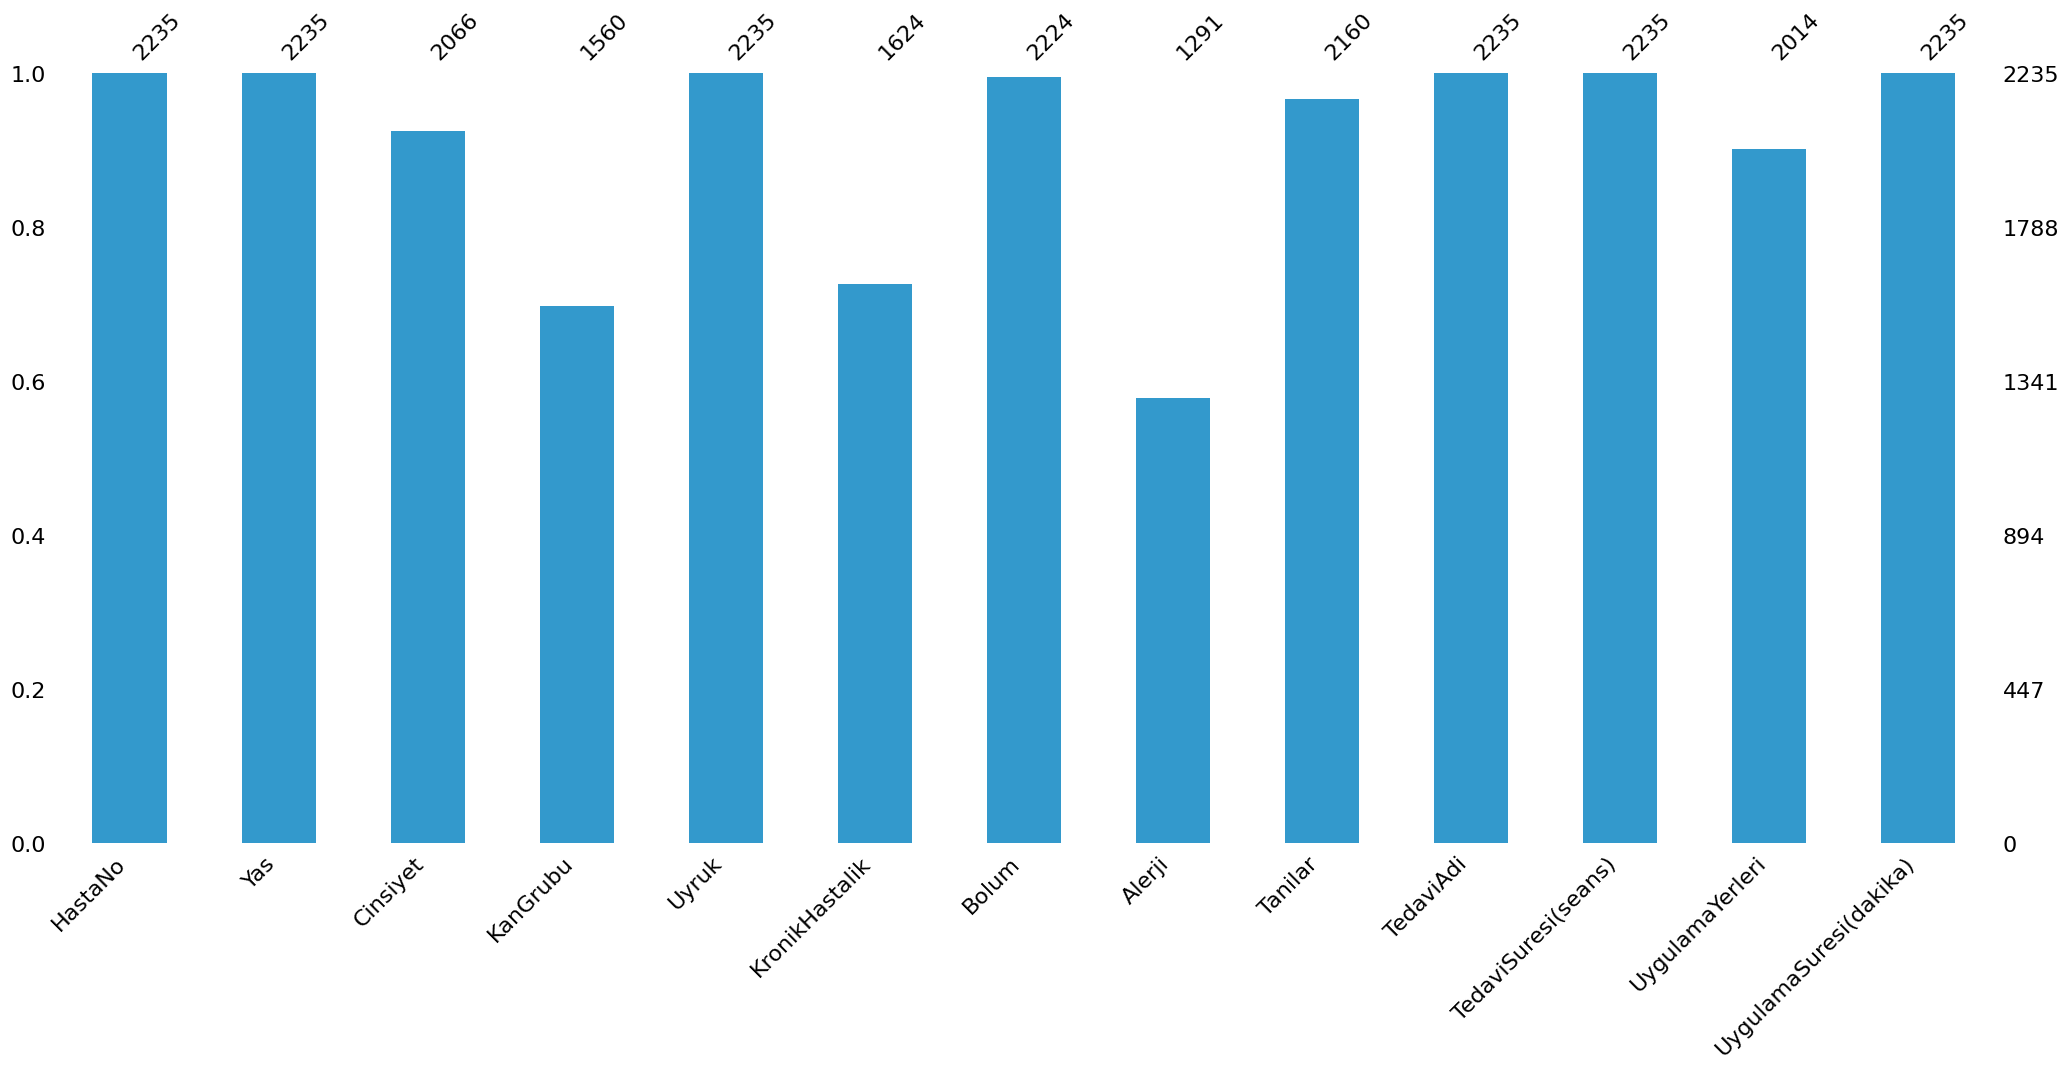

In [38]:
import missingno as msno
plt.figure(figsize=(12,5))
msno.bar(df, color=(0.2, 0.6, 0.8))
plt.show()

In [39]:
print("\nSummary statistics for numeric columns:")
print(df.describe())


Summary statistics for numeric columns:
             HastaNo          Yas  TedaviSuresi(seans)  UygulamaSuresi(dakika)
count    2235.000000  2235.000000          2235.000000             2235.000000
mean   145333.100224    47.327069            14.570917               16.573154
std       115.214248    15.208634             3.725322                6.268635
min    145134.000000     2.000000             1.000000                3.000000
25%    145235.000000    38.000000            15.000000               10.000000
50%    145331.000000    46.000000            15.000000               20.000000
75%    145432.000000    56.000000            15.000000               20.000000
max    145537.000000    92.000000            37.000000               45.000000


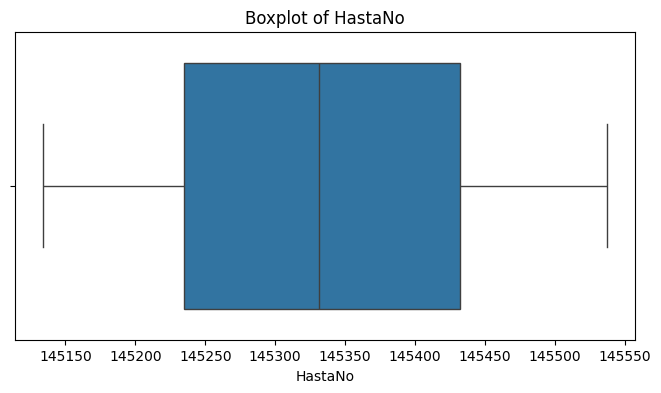

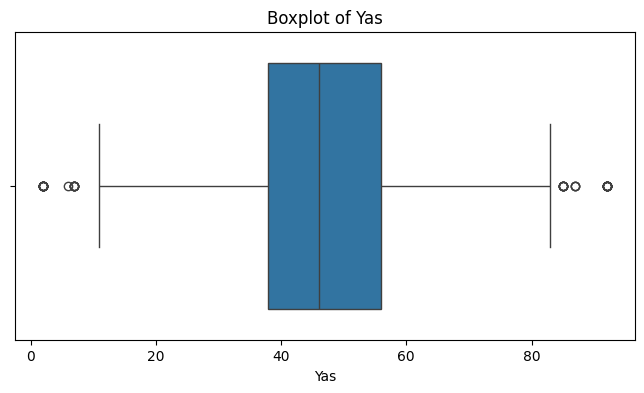

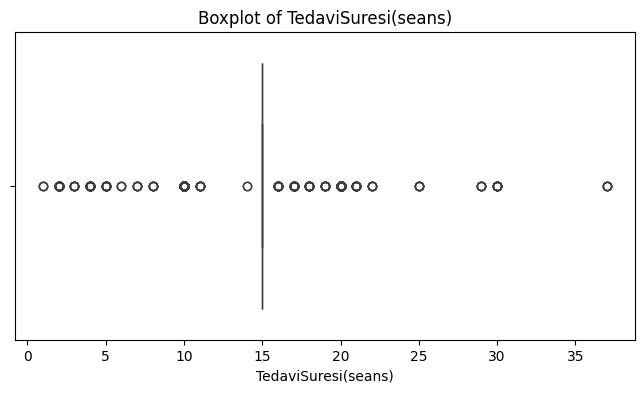

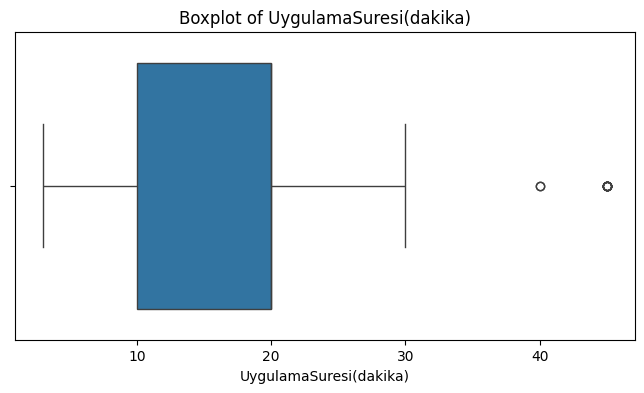

In [40]:
import matplotlib.pyplot as plt
import seaborn as sns

numeric_cols = df.select_dtypes(include='number').columns.tolist()

for col in numeric_cols:
    plt.figure(figsize=(8,4))
    sns.boxplot(x=df[col])
    plt.title(f'Boxplot of {col}')
    plt.show()

In [41]:
for col in categorical_cols:
    print(f"Column: {col}")
    print(df[col].value_counts(dropna=False))
    print("-"*40)

Column: Cinsiyet
Cinsiyet
Kadın    1274
Erkek     792
NaN       169
Name: count, dtype: int64
----------------------------------------
Column: KanGrubu
KanGrubu
NaN       675
0 Rh+     579
A Rh+     540
B Rh+     206
AB Rh+     80
B Rh-      68
A Rh-      53
0 Rh-      26
AB Rh-      8
Name: count, dtype: int64
----------------------------------------
Column: Uyruk
Uyruk
Türkiye       2173
Tokelau         27
Arnavutluk      13
Azerbaycan      12
Libya           10
Name: count, dtype: int64
----------------------------------------
Column: KronikHastalik
KronikHastalik
NaN                                                                             611
Myastenia gravis                                                                 38
Aritmi                                                                           36
Fascioscapulohumeral Distrofi                                                    36
Limb-Girdle Musküler Distrofi, Astım                                             34
      

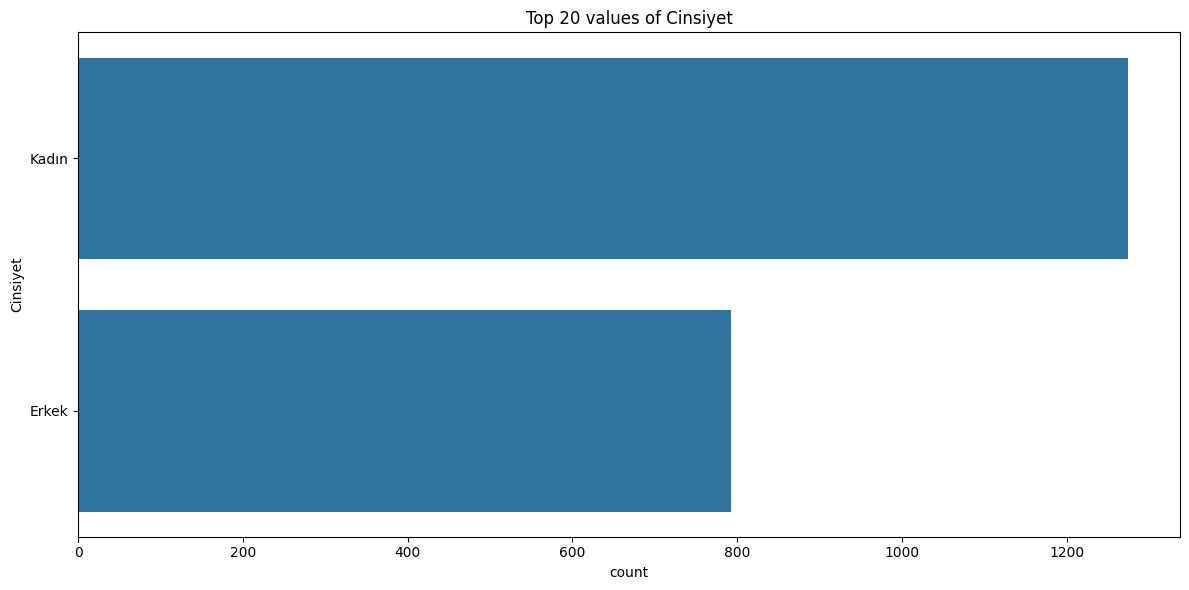

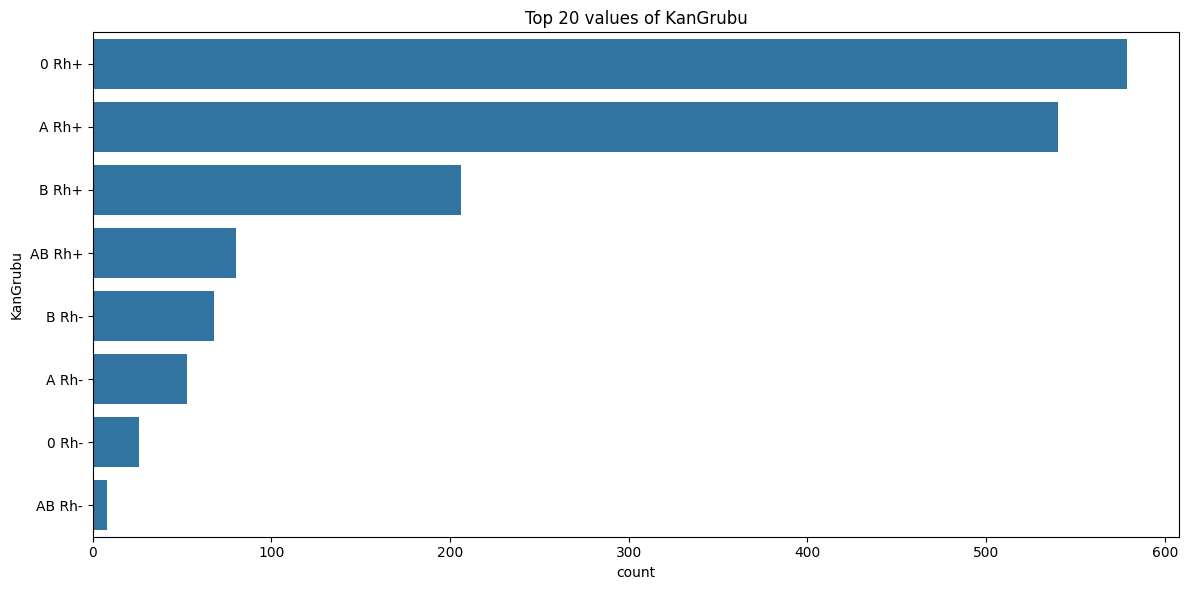

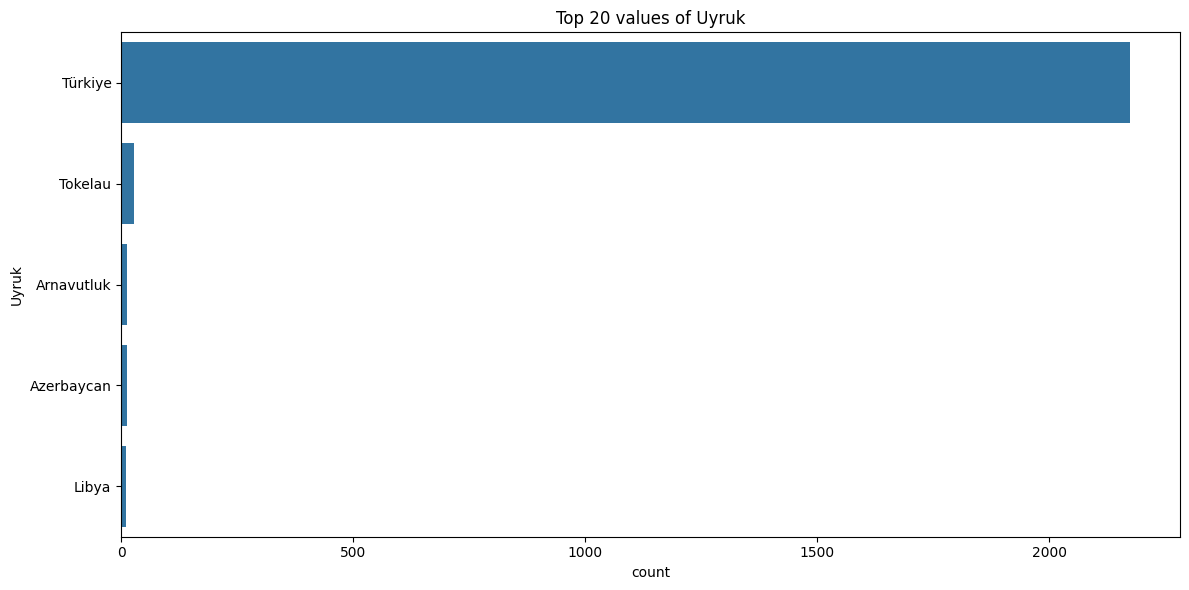

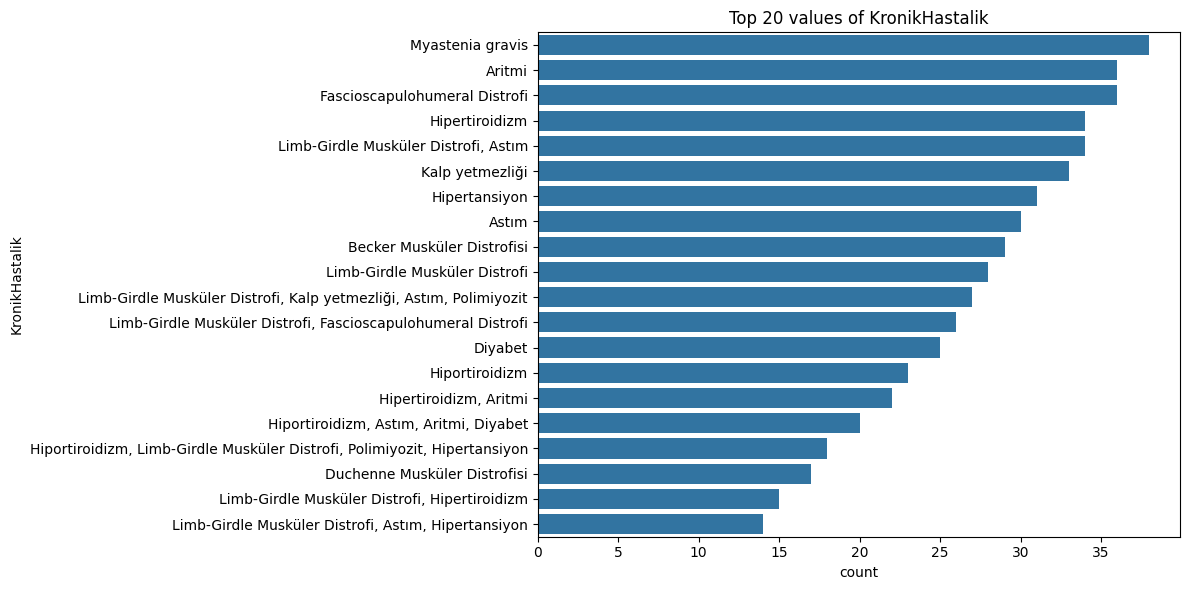

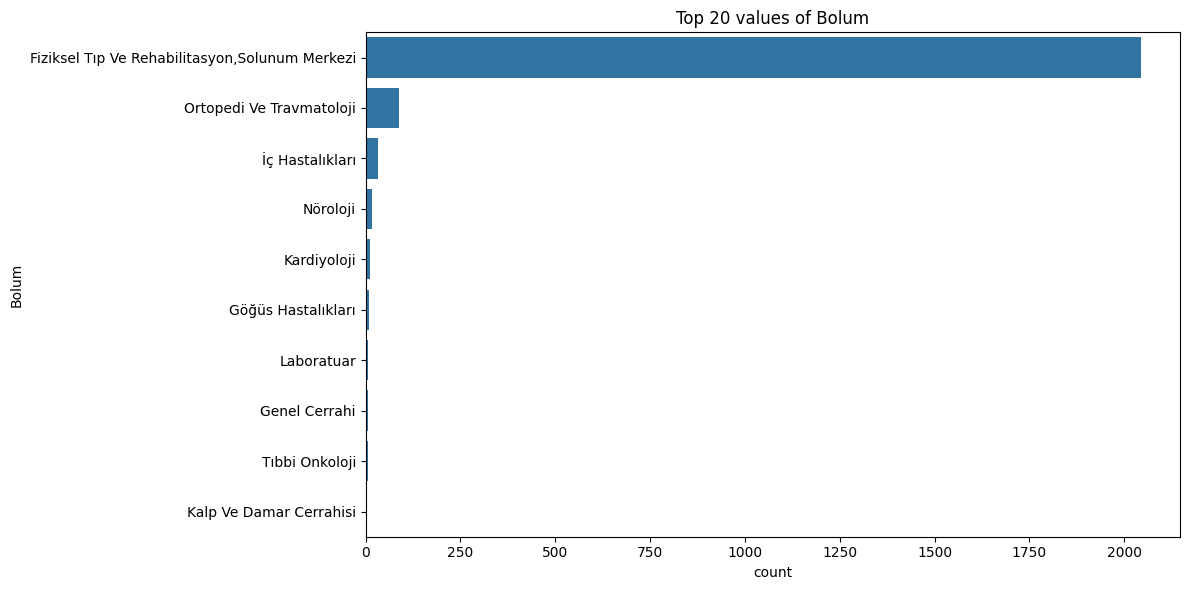

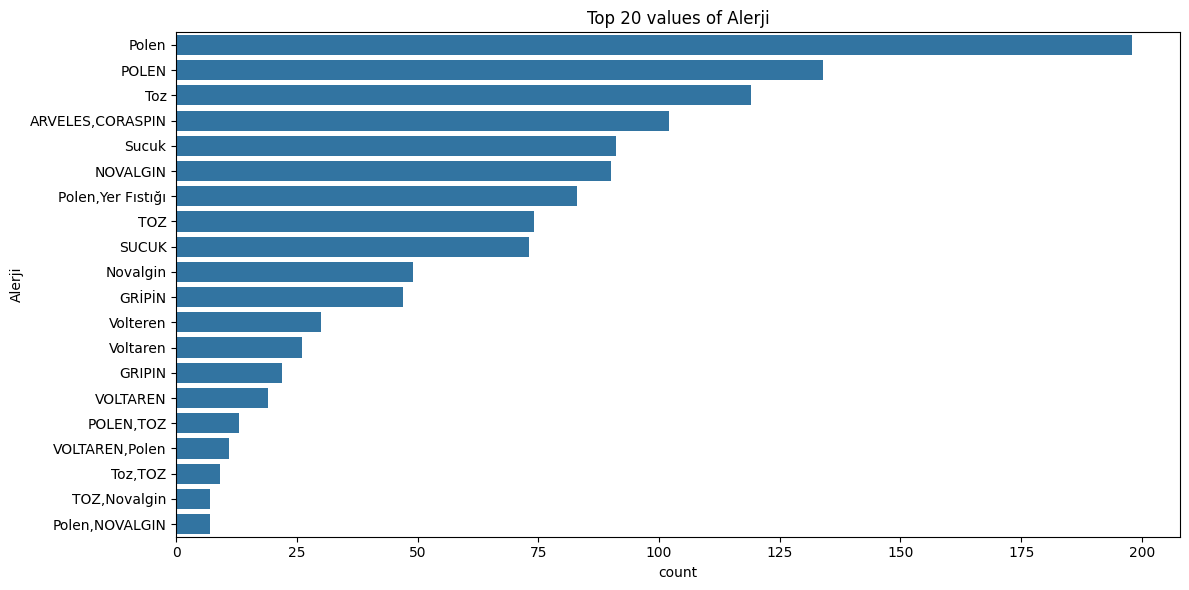

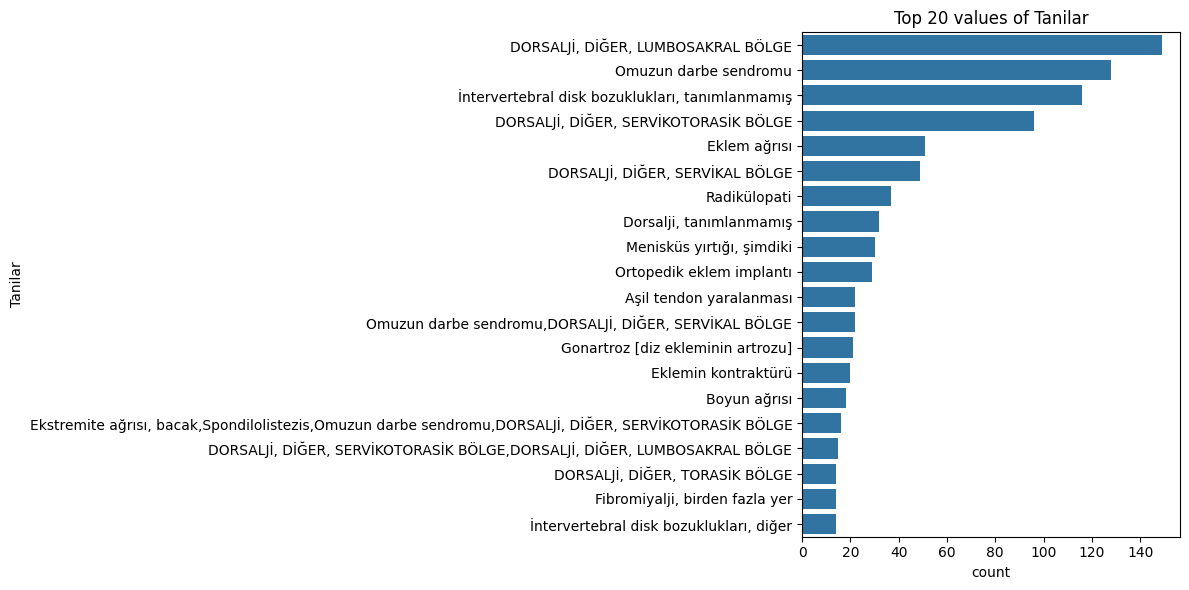

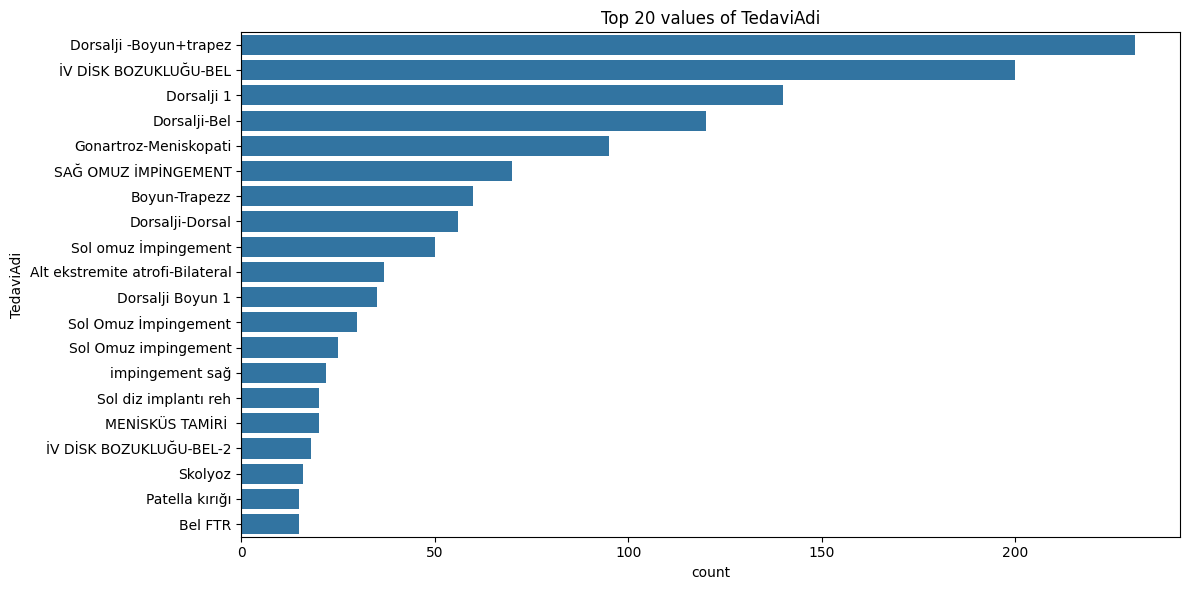

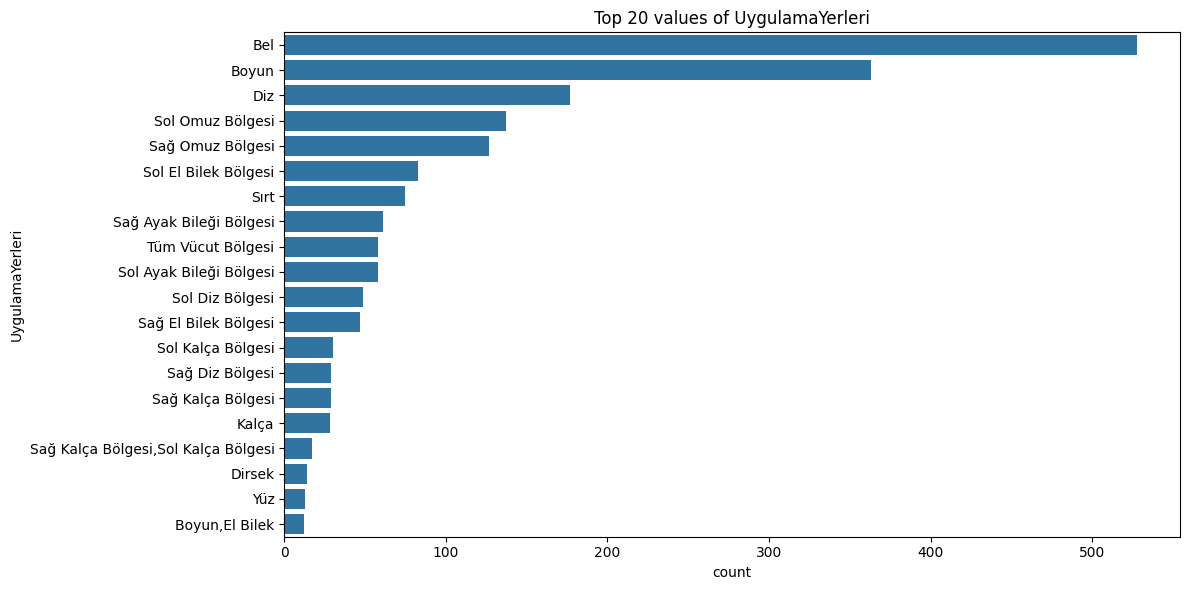

In [43]:
for col in categorical_cols:
    plt.figure(figsize=(12,6))
    top_vals = df[col].value_counts().nlargest(20).index
    sns.countplot(data=df, y=col, order=top_vals)
    plt.title(f"Top 20 values of {col}")
    plt.tight_layout()
    plt.show()


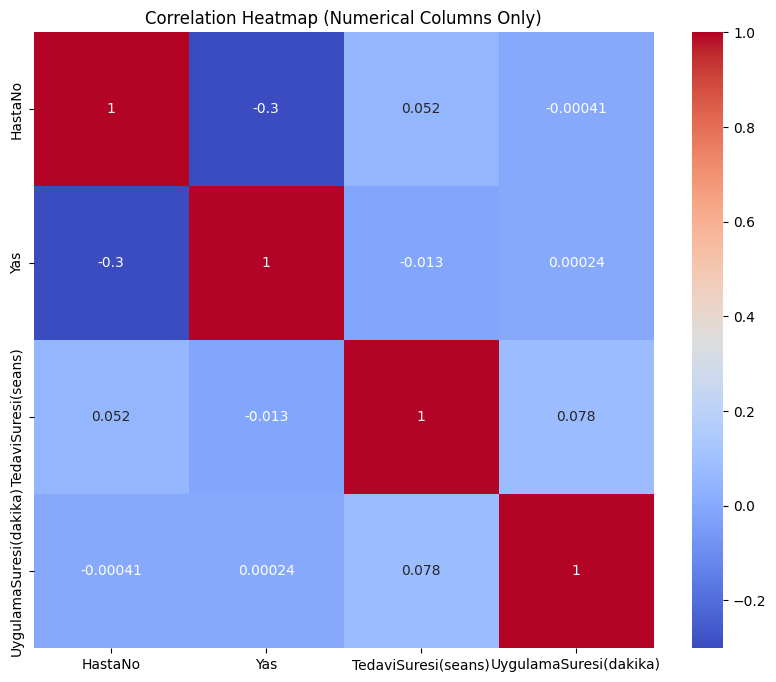

In [46]:
numeric_df = df.select_dtypes(include='number')

plt.figure(figsize=(10,8))
sns.heatmap(numeric_df.corr(), annot=True, cmap='coolwarm')
plt.title("Correlation Heatmap (Numerical Columns Only)")
plt.show()


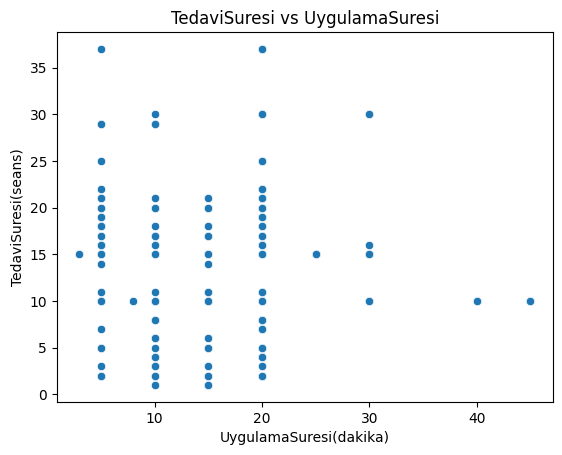

In [47]:
sns.scatterplot(data=df, x='UygulamaSuresi(dakika)', y='TedaviSuresi(seans)')
plt.title("TedaviSuresi vs UygulamaSuresi")
plt.show()

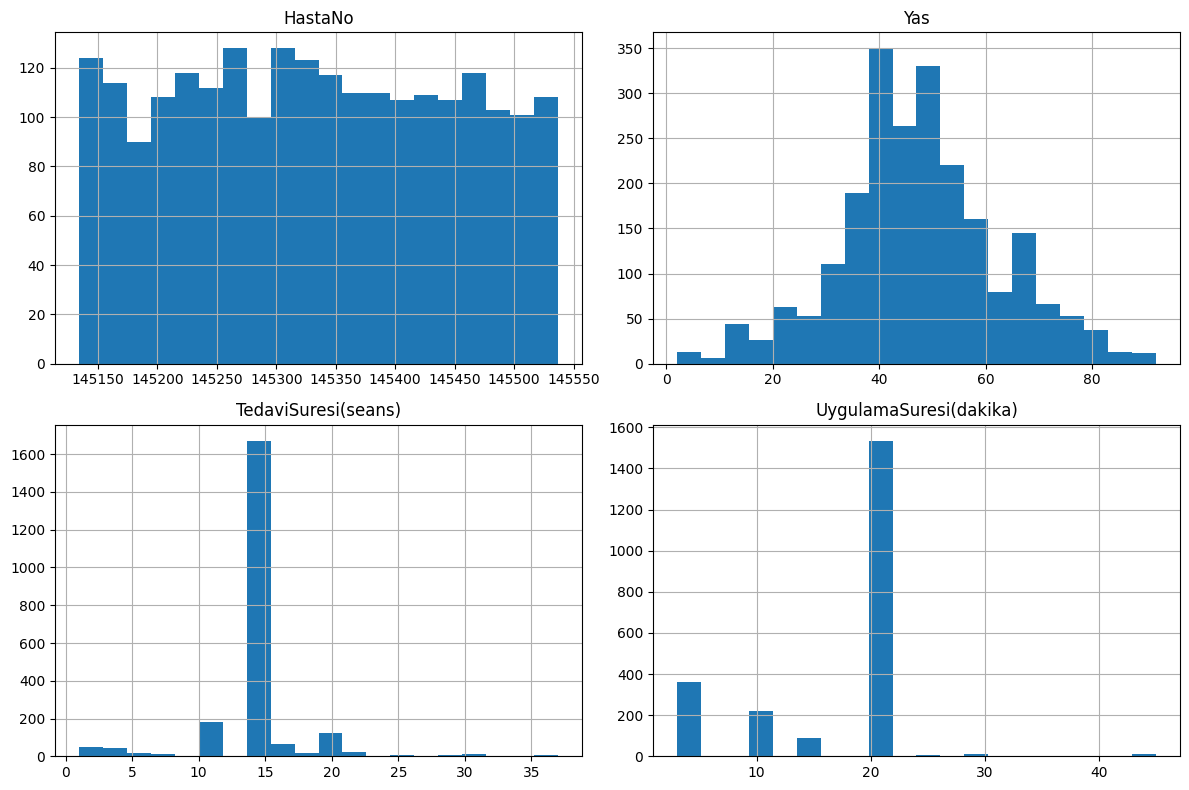

In [48]:
numeric_cols = df.select_dtypes(include='number').columns
df[numeric_cols].hist(bins=20, figsize=(12,8))
plt.tight_layout()
plt.show()


### Data Exploration Summary

- **Numeric columns**:
  - `HastaNo`: Unique identifier, not relevant for modeling, can be dropped.
  - `Yas`: Average age is 47, ranging from 2 to 92; includes both children and elderly, important for modeling.
  - `TedaviSuresi(seans)`: Mean is 14.5, max 37. Some outliers exist, should be considered before modeling.
  - `UygulamaSuresi(dakika)`: Mean is 16.5, max 45; some long sessions may be outliers.

- **Categorical columns and missing values**:
  - `Cinsiyet`: 169 missing (~7%), can be filled with the most frequent value or encoded appropriately.
  - `KanGrubu`: 675 missing (~30%), careful imputation needed.
  - `Uyruk`: Mostly "Türkiye" (>97%), few minority categories can be grouped or one-hot encoded.
  - `KronikHastalik`: 611 missing; 221 unique combinations. Consider grouping or using binary "has/don't have" feature.
  - `Bolum`: 11 missing, mostly "Fiziksel Tıp Ve Rehabilitasyon", easy to fill.
  - `Alerji`: 944 missing, contains inconsistent formats (case, multiple values). Needs normalization.
  - `Tanilar`: 75 missing; 368 unique values. Frequent diagnoses can be grouped for modeling.
  - `TedaviAdi`: No missing values, 244 unique values. Can focus on most frequent treatments or group them.
  - `UygulamaYerleri`: 221 missing; some entries contain multiple locations. Needs normalization.

- **General observations**:
  - Missing values are mostly in categorical columns. Decide on imputation or removal.
  - Many categorical columns have high cardinality. Consider grouping or feature engineering before modeling.
  - Numeric columns have some outliers that could affect modeling performance.
  - Since the goal is to predict `TedaviSuresi(seans)`, columns not affecting this target (e.g., `HastaNo`) can be dropped.


In [49]:
df.drop(columns=['HastaNo'], inplace=True)

## Handling Missing Values

### Chosen Imputation Strategies:
Cinsiyet - Missing: 169/2235 (~7.5%)
 - Method: Most Frequent
 - Reason: The missing rate is low, so filling with the most common category ('Kadın') is simple and sufficient.

KanGrubu - Missing: 675/2235 (~30%)
- Method: Random Sampling
- Reason: Medium-high missing rate and multiple categories. Random sampling preserves the existing distribution, reducing bias.

Tanilar - Missing: 75/2235 (~3.3%)
- Method: Constant ("Yok")
- Reason: Very low missing rate, filling with "Yok" clearly indicates absence of diagnosis, preserving meaningful information for modeling.

Alerji - Missing: 944/2235 (~42%)
- Method: Constant ("Yok")
- Reason: Large portion missing, filling with "Yok" avoids introducing artificial allergies and keeps information about absence of allergies intact.

KronikHastalik - Missing: 611/2235 (~27%)
- Method: Constant ("Yok")
- Reason: Medium missing rate, filling with "Yok" clearly indicates patients without chronic illnesses, preserving meaningful information for modeling.

Bolum - Missing: 11/2235 (~0.5%)
- Method: Most Frequent
- Reason: Very low missing rate, simple and sufficient to fill with the most common department.

UygulamaYerleri (Application Sites) - Missing: 221/2235 (~10%)
- Method: Random Sampling
- Reason: Medium missing rate and multiple categories. Random sampling preserves realistic distribution.


In [51]:
from sklearn.impute import SimpleImputer

most_freq_cols = ['Cinsiyet', 'Bolum']
most_freq_imputer = SimpleImputer(strategy='most_frequent')
df[most_freq_cols] = most_freq_imputer.fit_transform(df[most_freq_cols])

constant_cols = ['Tanilar', 'Alerji', 'KronikHastalik']
constant_imputer = SimpleImputer(strategy='constant', fill_value='Yok')
df[constant_cols] = constant_imputer.fit_transform(df[constant_cols])

def random_sample_impute(df, col):
    missing_mask = df[col].isna()
    n_missing = missing_mask.sum()
    if n_missing == 0:
        return df[col]
    sampled_values = df[col].dropna().sample(n=n_missing, replace=True, random_state=42).values
    df.loc[missing_mask, col] = sampled_values
    return df[col]

random_cols = ['KanGrubu', 'UygulamaYerleri']
for col in random_cols:
    df[col] = random_sample_impute(df, col)

print(df.isna().sum())


Yas                       0
Cinsiyet                  0
KanGrubu                  0
Uyruk                     0
KronikHastalik            0
Bolum                     0
Alerji                    0
Tanilar                   0
TedaviAdi                 0
TedaviSuresi(seans)       0
UygulamaYerleri           0
UygulamaSuresi(dakika)    0
dtype: int64


## Encoding Categorical Variables

In [89]:
from sklearn.preprocessing import MultiLabelBinarizer

In [54]:
for col in categorical_cols:
    df[col] = df[col].astype(str).str.lower().str.strip()

In [71]:
df = pd.get_dummies(df, columns=["Cinsiyet"], drop_first=False)

In [81]:
df["Uyruk_binary"] = (df["Uyruk"] != "türkiye").astype(int)

In [90]:
df["UygulamaYerleri_list"] = df["UygulamaYerleri"].dropna().apply(lambda x: [i.strip() for i in x.split(",")])
mlb = MultiLabelBinarizer()
uyg_encoded = mlb.fit_transform(df["UygulamaYerleri_list"].dropna())
uyg_df = pd.DataFrame(uyg_encoded, columns=[f"uyg_{c}" for c in mlb.classes_], index=df["UygulamaYerleri_list"].dropna().index)
df = df.join(uyg_df).drop(columns=["UygulamaYerleri_list"])

In [ ]:
rare_bolum = df["Bolum"].value_counts()[df["Bolum"].value_counts() < 50].index
df["Bolum"] = df["Bolum"].replace(rare_bolum, "other")
df = pd.get_dummies(df, columns=["Bolum"], drop_first=False)

In [84]:
top_tedavi = df["TedaviAdi"].value_counts().head(30).index
df["TedaviAdi"] = df["TedaviAdi"].apply(lambda x: x if x in top_tedavi else "other")
df = pd.get_dummies(df, columns=["TedaviAdi"], drop_first=False)

In [ ]:
top_tanilar = df["Tanilar"].value_counts().head(20).index
df["Tanilar"] = df["Tanilar"].apply(lambda x: x if x in top_tanilar else "other")
df = pd.get_dummies(df, columns=["Tanilar"], drop_first=False)

In [93]:
df.loc[df["KronikHastalik"] == "yok", "KronikHastalik"] = np.nan
df["KronikHastalik_list"] = df["KronikHastalik"].dropna().apply(lambda x: [i.strip() for i in x.split(",")])
mlb = MultiLabelBinarizer()
kronik_encoded = mlb.fit_transform(df["KronikHastalik_list"].dropna())
kronik_df = pd.DataFrame(kronik_encoded, columns=[f"kronik_{c}" for c in mlb.classes_], index=df["KronikHastalik_list"].dropna().index)
df = df.join(kronik_df).drop(columns=["KronikHastalik_list"])

In [94]:
df.loc[df["Alerji"] == "yok", "Alerji"] = np.nan
df["Alerji_list"] = df["Alerji"].dropna().apply(lambda x: [i.strip() for i in x.split(",")])
mlb = MultiLabelBinarizer()
alerji_encoded = mlb.fit_transform(df["Alerji_list"].dropna())
alerji_df = pd.DataFrame(alerji_encoded, columns=[f"alerji_{c}" for c in mlb.classes_], index=df["Alerji_list"].dropna().index)
df = df.join(alerji_df).drop(columns=["Alerji_list"])

In [ ]:
df = pd.get_dummies(df, columns=["KanGrubu"], drop_first=False)

In [101]:
kronik_cols = [col for col in df.columns if col.startswith("Kronik")]
alerji_cols = [col for col in df.columns if col.startswith("Alerji")]
df[kronik_cols] = df[kronik_cols].fillna(0)
df[alerji_cols] = df[alerji_cols].fillna(0)

In [102]:
for col in df.columns:
    print(f"Column: {col}")
    print(df[col].value_counts(dropna=False))
    print("-"*40)

Column: Yas
Yas
48    118
40     94
44     83
37     79
43     76
     ... 
13      3
83      3
87      3
76      2
6       1
Name: count, Length: 75, dtype: int64
----------------------------------------
Column: Uyruk
Uyruk
türkiye       2173
tokelau         27
arnavutluk      13
azerbaycan      12
libya           10
Name: count, dtype: int64
----------------------------------------
Column: KronikHastalik
KronikHastalik
0                                                                               611
myastenia gravis                                                                 38
aritmi                                                                           36
fascioscapulohumeral distrofi                                                    36
limb-girdle musküler distrofi, astım                                             34
                                                                               ... 
aritmi, diyabet, kalp yetmezliği, hiportiroidizm                       

## Feature Engineering

In [103]:
bins = [0, 18, 40, 65, 120]  # yaş aralıkları
labels = ["0-18", "19-40", "41-65", "65+"]
df["Yas_grup"] = pd.cut(df["Yas"], bins=bins, labels=labels, right=True)

df = pd.get_dummies(df, columns=["Yas_grup"], drop_first=False)

kronik_cols = [col for col in df.columns if col.startswith("kronik_")]
df["kronik_sayisi"] = df[kronik_cols].sum(axis=1)

alerji_cols = [col for col in df.columns if col.startswith("alerji_")]
df["alerji_sayisi"] = df[alerji_cols].sum(axis=1)


En yüksek ortalama tedavi süresi olan 10 tanı:
Tanilar_kondromalazia patella                                                             17.500000
Tanilar_dorsalji̇, di̇ğer, lumbosakral bölge                                              16.302632
Tanilar_dorsalji̇, di̇ğer, servi̇kotorasi̇k bölge                                         15.479592
Tanilar_dorsalji, tanımlanmamış                                                           15.470588
Tanilar_i̇ntervertebral disk bozuklukları, tanımlanmamış                                  15.186441
Tanilar_ortopedik eklem implantı                                                          15.172414
Tanilar_omuzun darbe sendromu                                                             15.038462
Tanilar_omuzun darbe sendromu,dorsalji̇, di̇ğer, servi̇kal bölge                          15.000000
Tanilar_dorsalji̇, di̇ğer, servi̇kotorasi̇k bölge,dorsalji̇, di̇ğer, lumbosakral bölge    15.000000
Tanilar_eklem ağrısı                                 

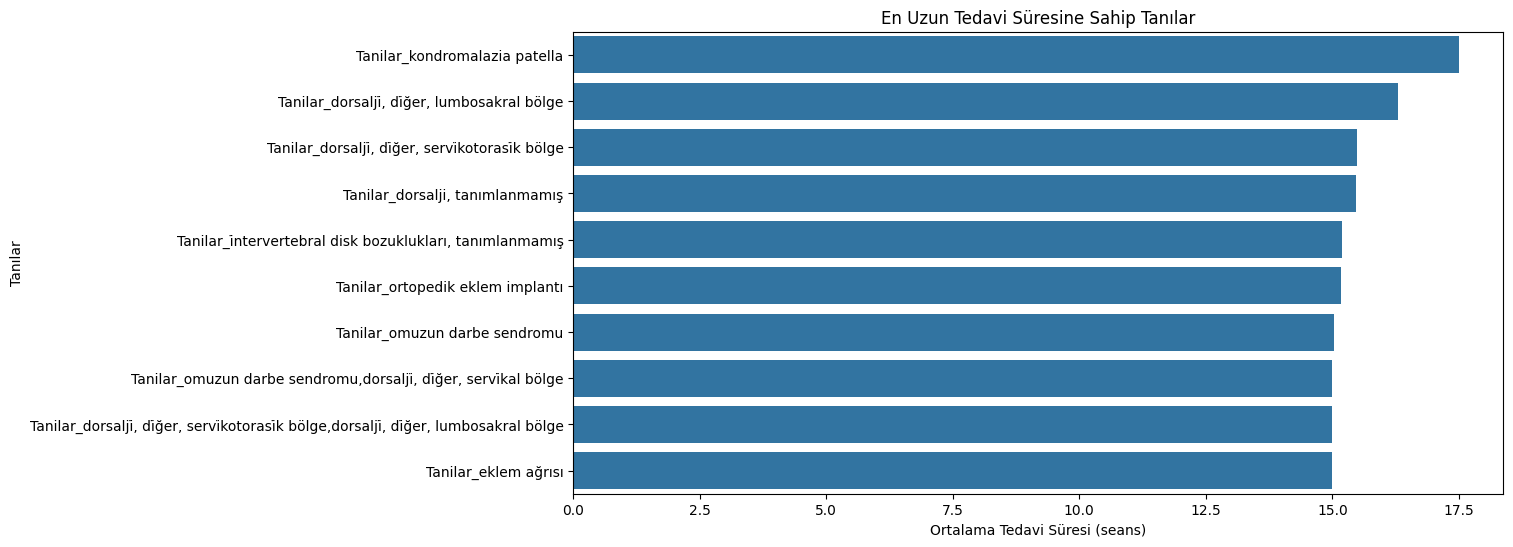

In [107]:
tanilar_mean = {}
tanilar_cols = [col for col in df.columns if col.startswith("Tanilar_")]
for col in tanilar_cols:
    tanilar_mean[col] = df.loc[df[col]==1, "TedaviSuresi(seans)"].mean()
tanilar_mean = pd.Series(tanilar_mean).sort_values(ascending=False)
print("En yüksek ortalama tedavi süresi olan 10 tanı:")
print(tanilar_mean.head(10))

plt.figure(figsize=(12,6))
sns.barplot(x=tanilar_mean.head(10).values, y=tanilar_mean.head(10).index)
plt.xlabel("Ortalama Tedavi Süresi (seans)")
plt.ylabel("Tanılar")
plt.title("En Uzun Tedavi Süresine Sahip Tanılar")
plt.show()





En yüksek ortalama tedavi süresi olan 10 tedavi:
TedaviAdi_bel                          21.000000
TedaviAdi_aşil rüptürü op              19.000000
TedaviAdi_algonörodistrofi sol ayak    17.500000
TedaviAdi_ayak bileği post op          17.500000
TedaviAdi_meni̇sküs tami̇ri̇           16.250000
TedaviAdi_sol omuz impingement         16.200000
TedaviAdi_kalça ağrısı                 16.000000
TedaviAdi_dorsalji 1                   15.857143
TedaviAdi_dorsalji-dorsal              15.535714
TedaviAdi_gonartroz-meniskopati        15.473684
dtype: float64


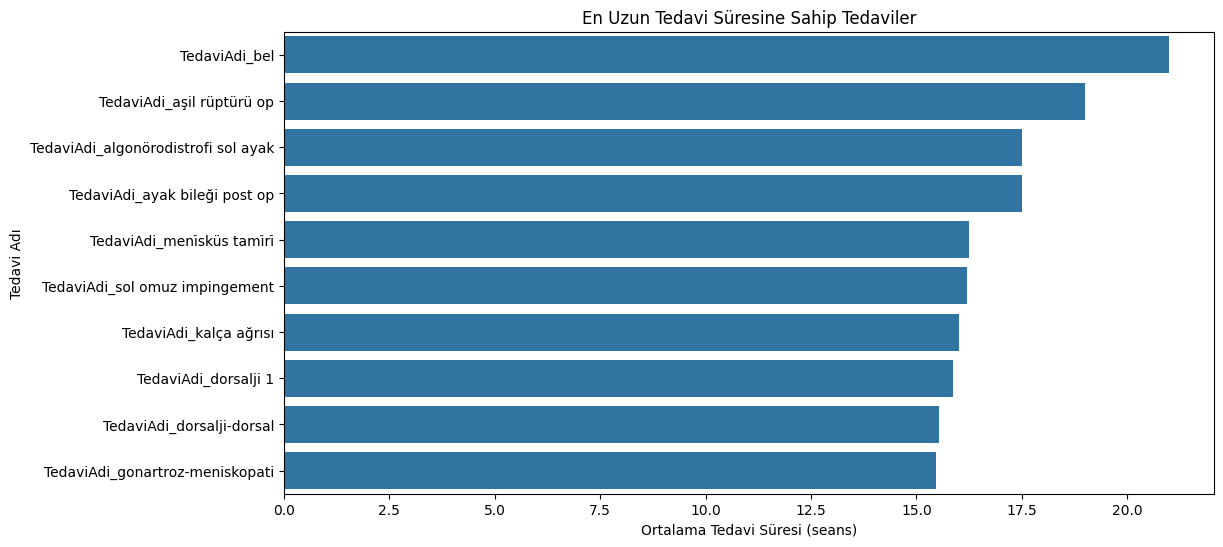

In [108]:
tedavi_cols = [col for col in df.columns if col.startswith("TedaviAdi_")]
tedavi_mean = {}
for col in tedavi_cols:
    tedavi_mean[col] = df.loc[df[col]==1, "TedaviSuresi(seans)"].mean()
tedavi_mean = pd.Series(tedavi_mean).sort_values(ascending=False)
print("En yüksek ortalama tedavi süresi olan 10 tedavi:")
print(tedavi_mean.head(10))

plt.figure(figsize=(12,6))
sns.barplot(x=tedavi_mean.head(10).values, y=tedavi_mean.head(10).index)
plt.xlabel("Ortalama Tedavi Süresi (seans)")
plt.ylabel("Tedavi Adı")
plt.title("En Uzun Tedavi Süresine Sahip Tedaviler")
plt.show()

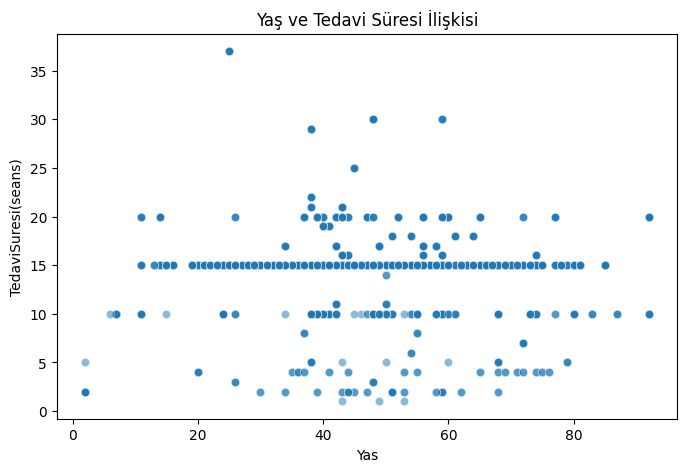

In [109]:
plt.figure(figsize=(8,5))
sns.scatterplot(x="Yas", y="TedaviSuresi(seans)", data=df, alpha=0.5)
plt.title("Yaş ve Tedavi Süresi İlişkisi")
plt.show()

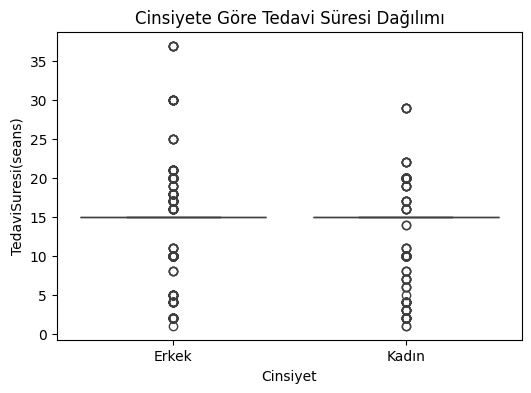

In [111]:
df["Cinsiyet"] = df["Cinsiyet_kadın"].apply(lambda x: "Kadın" if x==1 else "Erkek")
plt.figure(figsize=(6,4))
sns.boxplot(x="Cinsiyet", y="TedaviSuresi(seans)", data=df)
plt.title("Cinsiyete Göre Tedavi Süresi Dağılımı")
plt.show()


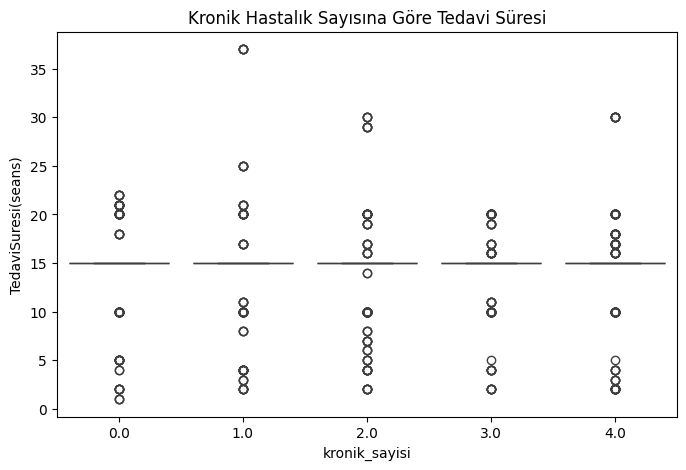

In [112]:
plt.figure(figsize=(8,5))
sns.boxplot(x="kronik_sayisi", y="TedaviSuresi(seans)", data=df)
plt.title("Kronik Hastalık Sayısına Göre Tedavi Süresi")
plt.show()

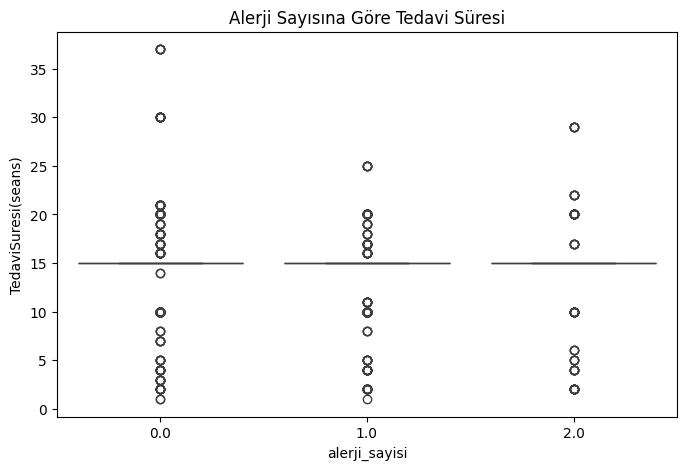

In [113]:
plt.figure(figsize=(8,5))
sns.boxplot(x="alerji_sayisi", y="TedaviSuresi(seans)", data=df)
plt.title("Alerji Sayısına Göre Tedavi Süresi")
plt.show()

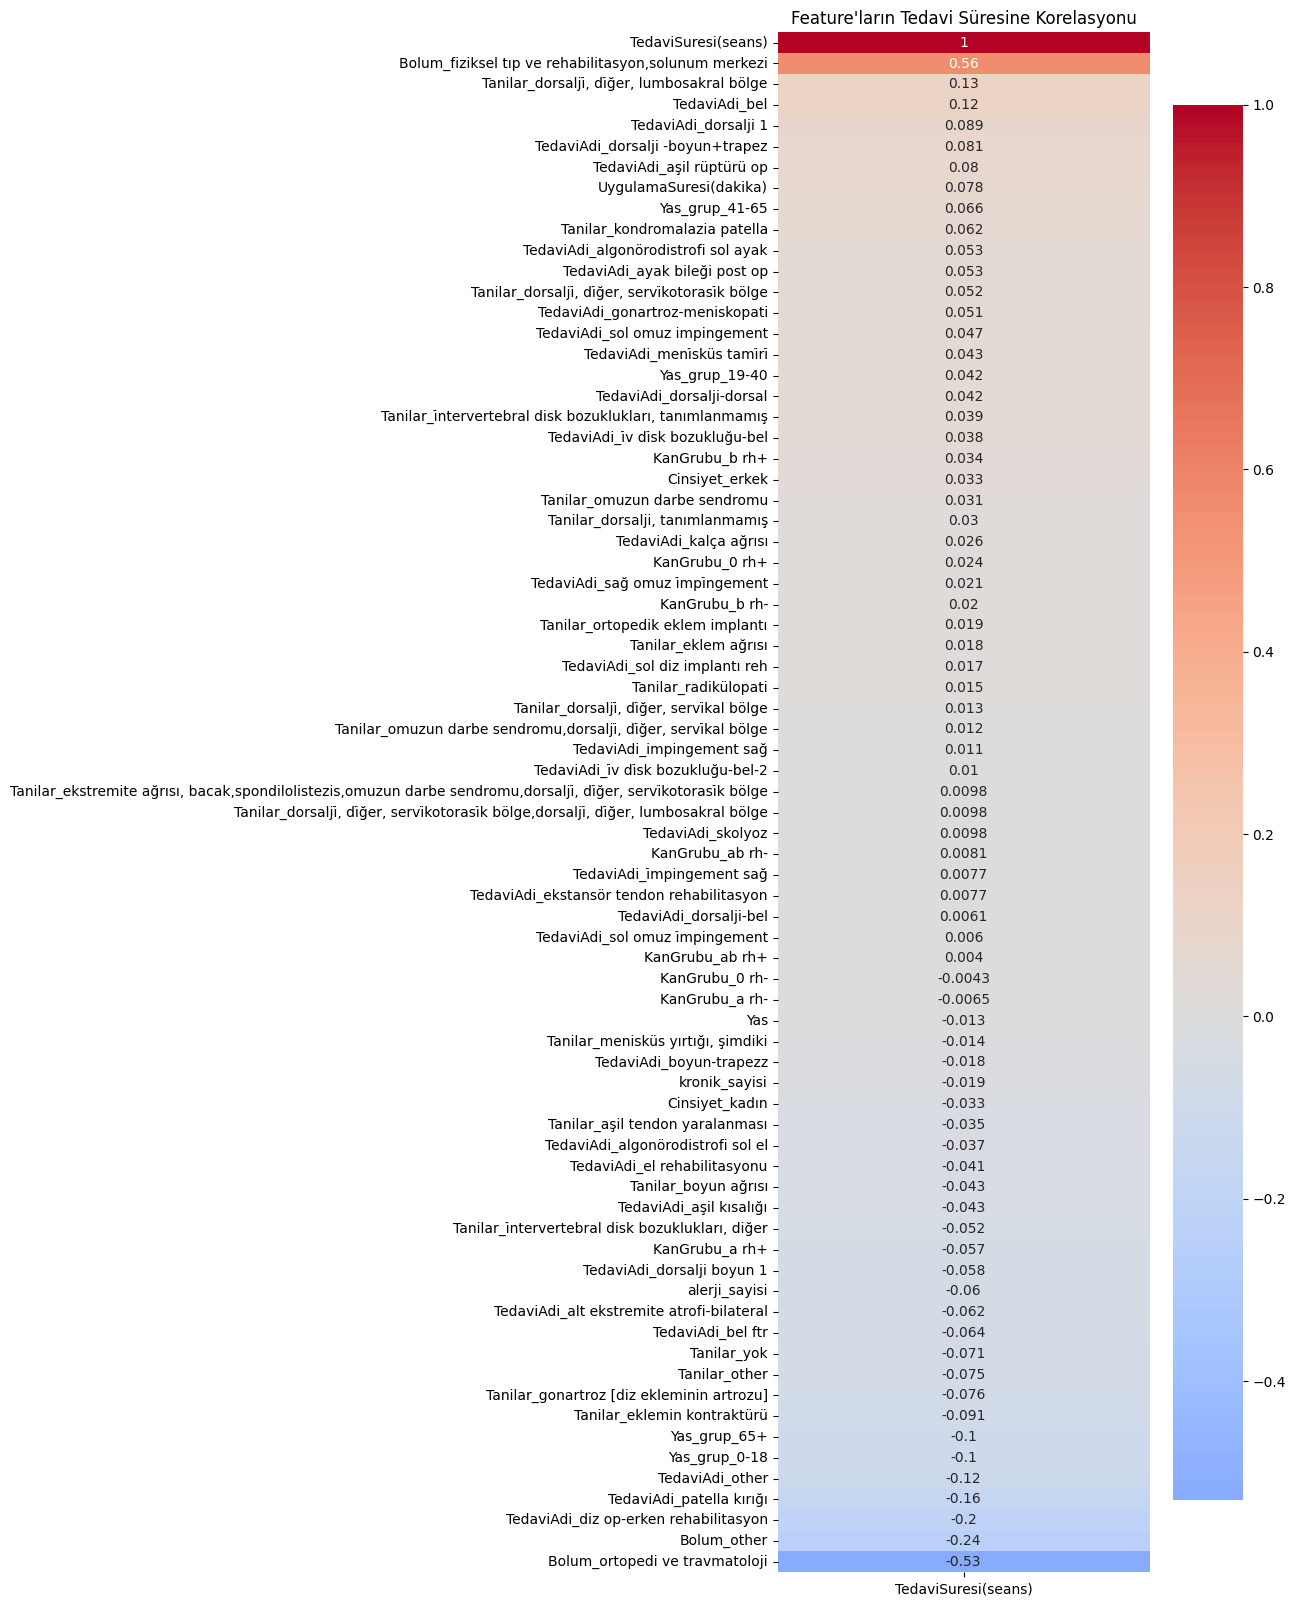

In [114]:
feature_cols = ["Yas", "kronik_sayisi", "alerji_sayisi", "UygulamaSuresi(dakika)"]
binary_cols = [col for col in df.columns if df[col].dtype == 'bool' or df[col].dtype == 'uint8']

corr_cols = feature_cols + binary_cols
corr_df = df[corr_cols + ["TedaviSuresi(seans)"]]
corr_matrix = corr_df.corr()
tedavi_corr = corr_matrix[["TedaviSuresi(seans)"]].sort_values(by="TedaviSuresi(seans)", ascending=False)
plt.figure(figsize=(6,20))
sns.heatmap(tedavi_corr, annot=True, cmap="coolwarm", center=0)
plt.title("Feature'ların Tedavi Süresine Korelasyonu")
plt.show()
